# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Natalie Moore

## Instructions
Test hypotheses for the price of automobiles:

*1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.*

- Figure 1 is the CDF plot of both the 'price' and 'log price' columns. Since they both have massively different scales ('price' being much larger), the 'log price' CDF is virtually verticle. Both will need to be scaled in order to truly compare their CDFs.


- Figure 2 is the CDF plot of both the 'price' and the 'log price' columns, scaled this time. It is now apparent that both CDFs are similar and from the same distribution (remember that 'log price' is just the log version of the 'price' column). Still, even with the similarities there is still deviations between both CDF curves.


- Between Figure 2 and Figure 3 are both K-S Tests for the scaled 'price' and 'log price' columns, assuming a normal distribution. As you can see, the KS-statistic and P-value are quite low for both tests. This suggests that the distance between both distributions (either 'price' or 'log price' and the normal distribution) is small, AND that there is a low chance the differences are from random sampling error. From this evidence it is clear that neither 'price' or 'log price' are perfectly modeled with the normal distribution. However, the p-value is much larger for 'log price' so I belive that distribution is closer to a normal one.


- Figure 3 is a histogram of both the scaled 'price' and 'log price' columns. Since they both have the same number of points, it's clear that the 'log price' column is just distributed differently than the 'price' column. The 'price' column also looks more skewed than 'log price'. Overlayed is the normalized distribution of the 'log price' column, which shows how the 'log price' column is a better fit for a normal distribution, as we saw from the K-S Tests above.


*2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.*

- Right before Figure 4, we used ANOVA to calculate the F stat and P-value for the stratified 'gas' and 'diesel' groups in the autoprice dataframe and produced a box plot of their spans. Here, the low F statistic shows that the difference in the variance between gas and diesel is fairly low and the high P-value shows that the differences present are likely to be from random chance. These results indicate that there is not a significant difference in log price between gas and diesel cars. 

- Furthermore, Figure 4 shows the IQR of both the diesel and gas stratified samples. Both IQRs overlap each other and the medians are fairly close together visually.


- Right before Figure 5, we used ANOVA to calculate the F stat and P-value for the stratified 'std' and 'turbo' groups in the autoprice dataframe and produced a box plot of their spans. Here, the high F statistic shows that the difference in the variance between gas and diesel is large and the extremely low P-value shows that the differences present are very unlikely to be from random chance. These results indicate that there is a significant difference in log price between turbo and standard aspiration cars.

- Furthermore, Figure 5 shows the IQR of both the std and turbo stratified samples. Neither IQRs overlap each other and the medians are fairly distant from each other visually.


- Right before Figure 6, we used ANOVA to calculate the F stat and P-value for the stratified 'fwd' and 'rwd' groups in the autoprice dataframe and produced a box plot of their spans. Here, the fairly high F statistic shows that the difference in the variance between gas and diesel is large and the fairly low P-value shows that the differences present are unlikely to be from random chance. These results indicate that there is a significant difference in log price between rear wheel and 4 wheel drive cars.

- Furthermore, Figure 6 shows the IQR of both the rwd and fwd stratified samples. Neither IQRs overlap each other much and the medians are fairly distant from each other visually.


3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.


- As you can see above, first we used ANOVA to calculate the F stat and P-value for the stratified bodystyle groups in the autoprice dataframe and produced a box plot of their spans. Here, the F statistic shows that the difference in the variance between gas and diesel may be large and the fairly low P-value shows that the differences present are unlikely to be from random chance. These results indicate that there may be a significant difference in log price between the bodystyle groups.


- Next, we used Tukey's HSD test to calculate the upper and lower mean differences between each bodystyle group. The test determined that we cannot reject the null hypothesis that the log price means are the same between each group, which means our ANOVA test was not very confident. 

- Furthermore, the two Tukey plots show a visual representation of the table produced from the Tukey HSD test.


4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.power as smsp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
%matplotlib inline

In [2]:
#Reading in the Auto Price data
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for missing values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

#creating the 'log price' column for this assignment
auto_price['log price'] = np.log(auto_price['price'])

In [3]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,9.349624
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.508971
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,8.540519
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,8.956284
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,9.234545
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,9.711661
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,10.723267


In [4]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


In [5]:
auto_price.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,9.731809
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,9.854560
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,9.975110
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,10.019936
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625,10.026811


In [6]:
print (auto_price.shape)
print (auto_price.dtypes)

(195, 27)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
log price            float64
dtype: object


## 1. Compare/test the normality of the distributions of 'price' / 'log price':

Text(0.5,1,'Figure 1')

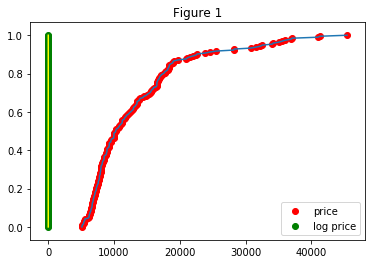

In [7]:
#Defining the function to plot the CDFs of our given distributions, 'price' and 'log price'
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label='price')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label='log price')
    
    plt.legend()

plot_cums(auto_price['price'], auto_price['log price']) 
plt.title('Figure 1')

Above is the CDF plot of both the 'price' and 'log price' columns. Since they both have massively different scales ('price' being much larger), the 'log price' CDF is virtually verticle. Both will need to be scaled in order to truly compare their CDFs.

C:\Users\natal\AnacondaNEW\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'Figure 2')

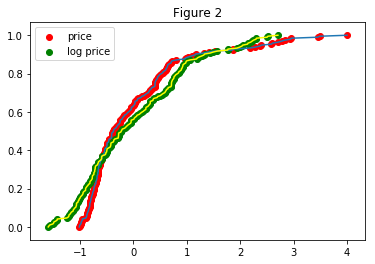

In [8]:
from sklearn.preprocessing import scale
price_s = scale(auto_price['price'])
logprice_s = scale(auto_price['log price'])
plot_cums(price_s, logprice_s)  
plt.title('Figure 2')

Above is the CDF plot of both the 'price' and the 'log price' columns, scaled this time. It is now apparent that both CDFs are similar and from the same distribution (remember that 'log price' is just the log version of the 'price' column). Still, even with the similarities there is still deviations between both CDF curves.

In [9]:
#Defining the function to perform the K-S Test for a normal distribution
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))    

In [10]:
#Performing the K-S Test on our scaled 'log price' column
ks_test(logprice_s)

KS-statistic = 0.10295537216792472
P-value = 0.029757993611015943


In [11]:
#Performing the K-S Test on our scaled 'price' column
ks_test(price_s)

KS-statistic = 0.15672300254932997
P-value = 0.00011937821625407352


Above are both K-S Tests for the scaled 'price' and 'log price' columns, assuming a normal distribution. As you can see, the KS-statistic and P-value are quite low for both tests. This suggests that the distance between both distributions (either 'price' or 'log price' and the normal distribution) is small, AND that there is a low chance the differences are from random sampling error. From this evidence it is clear that neither 'price' or 'log price' are perfectly modeled with the normal distribution. However, the p-value is much larger for 'log price' so I belive that distribution is closer to a normal one.

C:\Users\natal\AnacondaNEW\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\natal\AnacondaNEW\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Figure 3')

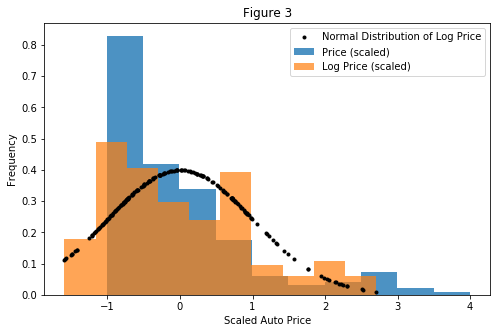

In [12]:
#creating the fit for a normal distribution based on log price
fit_ls = ss.norm.pdf(logprice_s, np.mean(logprice_s), np.std(logprice_s))

#Plotting Figure 1
plt.figure(figsize=(8,5))

plt.hist(price_s,normed=True,alpha=.8,label='Price (scaled)')
plt.hist(logprice_s,normed=True,alpha=.7,label='Log Price (scaled)')
plt.plot(logprice_s,fit_ls,'.',color='black',label='Normal Distribution of Log Price')

plt.legend()
plt.xlabel('Scaled Auto Price')
plt.ylabel('Frequency')
plt.title('Figure 3')

Above is a histogram of both the scaled 'price' and 'log price' columns. Since they both have the same number of points, it's clear that the 'log price' column is just distributed differently than the 'price' column. The 'price' column also looks more skewed than 'log price'. Overlayed is the normalized distribution of the 'log price' column, which shows how the 'log price' column is a better fit for a normal distribution, as we saw from the K-S Tests above.

## 2. Test significance of **log price** stratified by:
### a) **fuel type**

In [13]:
#defining the function to stratify my auto_price data by different groups
def stratify(dat, p):
    groups = dat.groupby(group) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    p = nums / dat.shape[0]
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))

In [14]:
#my stratified dataframe based on fuel-type
p = .1 #found from trial and error
group = 'fuel-type'

strat_fueltype = stratify(auto_price, p)
strat_fueltype = pd.DataFrame(strat_fueltype)
strat_fueltype = strat_fueltype[['fuel-type','log price']]
strat_fueltype

fuel-type  log price
fuel-type                         
diesel    70     diesel  10.360912
          110    diesel   9.536762
          68     diesel  10.248778
          158    diesel   8.974365
          108    diesel   9.487972
          184    diesel   8.986572
          159    diesel   8.960339
          67     diesel  10.148471
          182    diesel   8.958669
          63     diesel   9.286838
          174    diesel   9.277812
          69     diesel  10.246226
          192    diesel   9.535679
          116    diesel   9.795345
          203    diesel  10.019936
          90     diesel   8.867709
          114    diesel   9.745371
          187    diesel   9.158521
          66     diesel   9.817058
          112    diesel   9.735069
gas       4         gas   9.767095
          122       gas   8.937087
          105       gas   9.888323
          26        gas   8.937087
          79        gas   8.947546
          148       gas   8.988821
          37        gas   8.973985
          152       gas   8.777710
          95        gas   8.961751
          74        gas  10.723267
          89        gas   8.612322
          81        gas   9.047704
          12        gas   9.950848
          163       gas   8.994421
          19        gas   8.747511
          5         gas   9.632335
          50        gas   8.555452
          3         gas   9.543235
          135       gas   9.649240
          52        gas   8.823942

In [15]:
#Using ANOVA to find the F statistic and P-value 
gas = strat_fueltype['gas':'log price']['log price']
diesel = strat_fueltype['diesel':'log price']['log price']

f_statistic, p_value = ss.f_oneway(gas, diesel)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 1.2424111558511837
P-value = 0.2696043650791023


C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'fuel-type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 4')

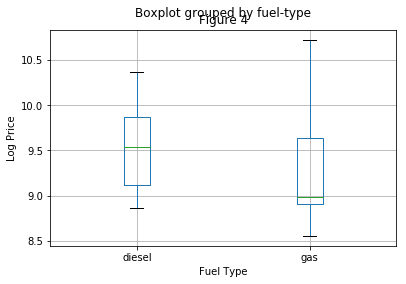

In [16]:
strat_fueltype.boxplot(by = ['fuel-type'])
plt.ylabel('Log Price')
plt.xlabel('Fuel Type')
plt.title('Figure 4')

As you can see above, we used ANOVA to calculate the F stat and P-value for the stratified 'gas' and 'diesel' groups in the autoprice dataframe and produced a box plot of their spans. Here, the low F statistic shows that the difference in the variance between gas and diesel is fairly low and the high P-value shows that the differences present are likely to be from random chance. These results indicate that there is not a significant difference in log price between gas and diesel cars.

Furthermore, Figure 4 shows the IQR of both the diesel and gas stratified samples. Both IQRs overlap each other and the medians are fairly close together visually.

### b) **aspiration**

In [17]:
#my stratified dataframe based on aspiration
p = .18 #found from trial and error
group = 'aspiration'

strat_aspiration = stratify(auto_price, p)
strat_aspiration = pd.DataFrame(strat_aspiration)
strat_aspiration = strat_aspiration[['aspiration','log price']]
strat_aspiration

aspiration  log price
aspiration                          
std        122        std   8.937087
           106        std   9.820052
           196        std   9.679406
           14         std  10.109078
           190        std   9.208338
           154        std   8.974365
           107        std   9.384294
           74         std  10.723267
           20         std   8.791030
           118        std   8.625509
           104        std   9.752607
           19         std   8.747511
           78         std   8.805225
           15         std  10.333970
           159        std   8.960339
           42         std   9.244259
           40         std   9.239414
           121        std   8.808668
           6          std   9.781885
           127        std  10.434939
           31         std   8.832734
           26         std   8.937087
           197        std   9.712024
           13         std   9.957265
           191        std   9.495143
           2          std   9.711116
           73         std  10.620351
           169        std   9.209240
           34         std   8.871926
           182        std   8.958669
...                   ...        ...
turbo      84       turbo   9.581145
           70       turbo  10.360912
           116      turbo   9.795345
           192      turbo   9.535679
           69       turbo  10.246226
           112      turbo   9.735069
           29       turbo   9.469932
           68       turbo  10.248778
           108      turbo   9.487972
           137      turbo   9.831992
           119      turbo   8.981807
           187      turbo   9.158521
           136      turbo   9.806426
           198      turbo   9.821192
           79       turbo   8.947546
           105      turbo   9.888323
           83       turbo   9.607034
           110      turbo   9.536762
           87       turbo   9.135509
           67       turbo  10.148471
           117      turbo   9.806426
           114      turbo   9.745371
           75       turbo   9.711297
           199      turbo   9.849559
           201      turbo   9.854560
           80       turbo   9.206232
           203      turbo  10.019936
           149      turbo   9.366831
           145      turbo   9.328923
           82       turbo   9.443751

[72 rows x 2 columns]

In [18]:
#Using ANOVA to find the F statistic and P-value 
std = strat_aspiration['std':'std']['log price']
turbo = strat_aspiration['turbo':'turbo']['log price']

f_statistic, p_value = ss.f_oneway(std, turbo)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 3.950951638164172
P-value = 0.05075777839539569


C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'aspiration' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 5')

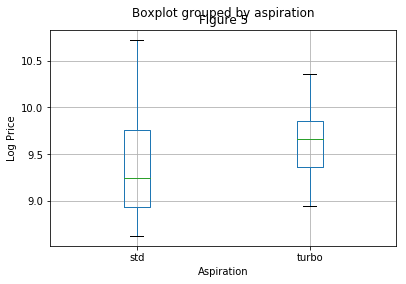

In [19]:
strat_aspiration.boxplot(by = ['aspiration'])
plt.ylabel('Log Price')
plt.xlabel('Aspiration')
plt.title('Figure 5')

As you can see above, we used ANOVA to calculate the F stat and P-value for the stratified 'std' and 'turbo' groups in the autoprice dataframe and produced a box plot of their spans. Here, the high F statistic shows that the difference in the variance between gas and diesel is large and the extremely low P-value shows that the differences present are very unlikely to be from random chance. These results indicate that there is a significant difference in log price between turbo and standard aspiration cars.

Furthermore, Figure 5 shows the IQR of both the std and turbo stratified samples. Neither IQRs overlap each other much and the medians are fairly distant from each other visually.

### c) **rear vs. front wheel drive**

In [20]:
#my stratified dataframe based on drive-wheels
p = .04 #found from trial and error
group = 'drive-wheels'

strat_drivewheels = stratify(auto_price, p)
strat_drivewheels = pd.DataFrame(strat_drivewheels)
strat_drivewheels = strat_drivewheels[['drive-wheels','log price']]
strat_drivewheels

drive-wheels  log price
drive-wheels                            
4wd          155          4wd   9.080004
             140          4wd   8.936298
             4            4wd   9.767095
             144          4wd   9.130539
             149          4wd   9.366831
             154          4wd   8.974365
             148          4wd   8.988821
             145          4wd   9.328923
fwd          100          fwd   9.164192
             99           fwd   9.099297
             147          fwd   9.229947
             31           fwd   8.832734
             135          fwd   9.649240
             64           fwd   9.327679
             182          fwd   8.958669
             92           fwd   8.831858
rwd          194          rwd   9.468079
             104          rwd   9.752607
             17           rwd  10.515425
             73           rwd  10.620351
             163          rwd   8.994421
             203          rwd  10.019936
             128          rwd  10.519430
             48           rwd  10.478695

In [21]:
#Using ANOVA to find the F statistic and P-value 
fwd = strat_drivewheels['fwd':'fwd']['log price']
rwd = strat_drivewheels['rwd':'rwd']['log price']

f_statistic, p_value = ss.f_oneway(fwd, rwd)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 15.360153454070478
P-value = 0.0015423644417765778


C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'drive-wheels' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 6')

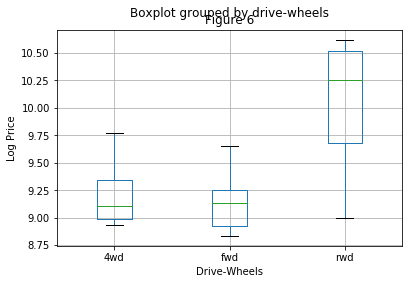

In [22]:
strat_drivewheels.boxplot(by = ['drive-wheels'])
plt.ylabel('Log Price')
plt.xlabel('Drive-Wheels')
plt.title('Figure 6')

As you can see above, we used ANOVA to calculate the F stat and P-value for the stratified 'fwd' and 'rwd' groups in the autoprice dataframe and produced a box plot of their spans. Here, the fairly high F statistic shows that the difference in the variance between gas and diesel is large and the fairly low P-value shows that the differences present are unlikely to be from random chance. These results indicate that there is a significant difference in log price between turbo and standard aspiration cars.

Furthermore, Figure 6 shows the IQR of both the rwd and fwd stratified samples. Neither IQRs overlap each other much and the medians are fairly distant from each other visually.

## 3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **log price** of autos stratified by **body style**:

In [23]:
#my stratified dataframe based on body-style
p = .03 #found from trial and error
group = 'body-style'

strat_bodystyle = stratify(auto_price, p)
strat_bodystyle = pd.DataFrame(strat_bodystyle)
strat_bodystyle = strat_bodystyle[['body-style','log price']]
strat_bodystyle

body-style  log price
body-style                             
convertible 0    convertible   9.510075
            189  convertible   9.358329
            172  convertible   9.779567
            1    convertible   9.711116
            128  convertible  10.519430
            72   convertible  10.464702
hardtop     74       hardtop  10.723267
            170      hardtop   9.323580
            126      hardtop  10.389857
            98       hardtop   9.017847
            168      hardtop   9.173573
            69       hardtop  10.246226
hatchback   82     hatchback   9.443751
            104    hatchback   9.752607
            83     hatchback   9.607034
            120    hatchback   8.736971
            52     hatchback   8.823942
            23     hatchback   8.981807
sedan       111        sedan   9.653743
            13         sedan   9.957265
            202        sedan   9.975110
            92         sedan   8.831858
            70         sedan  10.360912
            5          sedan   9.632335
wagon       28         wagon   9.096163
            181        wagon   9.664596
            195        wagon   9.504129
            199        wagon   9.849559
            197        wagon   9.712024
            146        wagon   8.917713

C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'body-style' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 7')

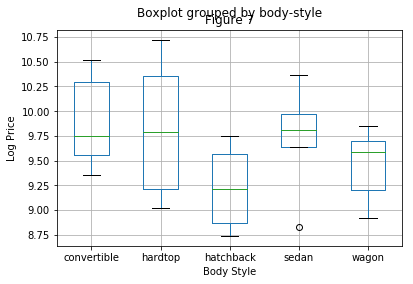

In [24]:
strat_bodystyle.boxplot(by = ['body-style'])
plt.ylabel('Log Price')
plt.xlabel('Body Style')
plt.title('Figure 7')

In [29]:
#Using ANOVA to find the F statistic and P-value 
convertible = strat_bodystyle['convertible':'convertible']['log price']
hardtop = strat_bodystyle['hardtop':'hardtop']['log price']
hatchback = strat_bodystyle['hatchback':'hatchback']['log price']
sedan = strat_bodystyle['sedan':'sedan']['log price']
wagon = strat_bodystyle['wagon':'hardtop']['log price']

f_statistic, p_value = ss.f_oneway(convertible, hardtop, hatchback, sedan, wagon)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = nan
P-value = nan


C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


In [26]:
#Using Tukey's HSD test to compare the body style groups
convertible = list(convertible.values)
hardtop = list(hardtop.values)
hatchback = list(hatchback.values)
sedan = list(sedan.values)
wagon = list(wagon.values)

df = pd.DataFrame({'vals': convertible + hardtop + hatchback + sedan + wagon,
                   'group_num': ['convertible'] * 5 + ['hardtop'] * 5 + ['hatchback'] * 5 + ['sedan'] * 5 + ['wagon'] * 5})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

ValueError: arrays must all be same length

In [ ]:
Tukey_HSD.plot_simultaneous()

As you can see above, first we used ANOVA to calculate the F stat and P-value for the stratified bodystyle groups in the autoprice dataframe and produced a box plot of their spans. Here, the F statistic shows that the difference in the variance between gas and diesel may be large and the fairly low P-value shows that the differences present are unlikely to be from random chance. These results indicate that there may be a significant difference in log price between the bodystyle groups.

Next, we used Tukey's HSD test to calculate the upper and lower mean differences between each bodystyle group. The test determined that we cannot reject the null hypothesis that the log price means are the same between each group, which means our ANOVA test was not very confident. 

Furthermore, the two Tukey plots show a visual representation of the table produced from the Tukey HSD test.

## 4. Graphically explore the differences between the price conditioned by the categories of each variable:

In [ ]:
p = 1 #to be replaced within the stratify function
group = ['make','num-of-doors','engine-location','engine-type','num-of-cylinders','fuel-system']

def stratify(dat, p):
    groups = dat.groupby(group[i]) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    p = nums / dat.shape[0]
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))

for i in range(5):
    strat_var = stratify(auto_price, p)
    strat_var = pd.DataFrame(strat_var)
    strat_var = strat_var[[group[i],'price']]
    print (strat_var)


In [ ]:
#plotting boxplots of the remaining categorical columns of the autoprice dataframe (against price)
for i in range(5):
    auto_price.loc[:,['price',group[i]]].boxplot(by = [group[i]], figsize=(15,5))
    plt.show()